In [3]:
pip install pymysql

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import pymysql
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [115]:
pip install cryptography

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
connection=pymysql.connect(
    host="localhost",
    user="root",
    password="123456",
    database="Medical_Insurance_price"
)

In [3]:
df=pd.read_sql("select * from medical_insurance;",connection)

C:\Users\HP\AppData\Local\Temp\ipykernel_3068\2431359564.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df=pd.read_sql("select * from medical_insurance;",connection)


In [4]:
df.isnull().sum()

age         0
gender      0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<Axes: >

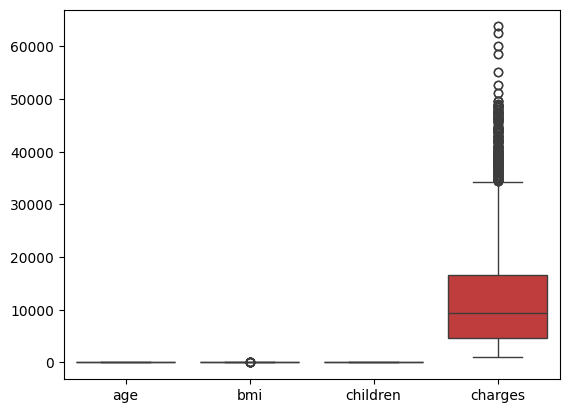

In [5]:
sns.boxplot(df)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   gender    2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


In [7]:
from sklearn.preprocessing import LabelEncoder,StandardScaler, MinMaxScaler

In [8]:
df.head()

,age,gender,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [9]:
df.head()

,age,gender,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [10]:
for i in df.columns:
    if i!="object":
        df[i]=LabelEncoder().fit_transform(df[i])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       2772 non-null   int64
 1   gender    2772 non-null   int64
 2   bmi       2772 non-null   int64
 3   children  2772 non-null   int64
 4   smoker    2772 non-null   int64
 5   region    2772 non-null   int64
 6   charges   2772 non-null   int64
dtypes: int64(7)
memory usage: 151.7 KB


In [12]:
x=df.drop(["charges","region"],axis=1)
y=df.charges

In [13]:
x_scaled=StandardScaler().fit_transform(x)

In [14]:
x_scaled1=MinMaxScaler().fit_transform(x)

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
xtrain,xtest,ytrain,ytest=train_test_split(x_scaled,y,test_size=0.2)

In [17]:
from lazypredict.Supervised import LazyClassifier,LazyRegressor

In [18]:
LR=LazyRegressor()

In [19]:
LC=LazyClassifier()

In [20]:
model,prediction=LR.fit(xtrain,xtest,ytrain,ytest)

  File "C:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\subprocess.py", line 1036, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
                        pass_fds, cwd, env,
                        ^^^^^^^^^^^^^^^^^^^
    ...<5 lines>...
                        gid, gids, uid, umask,
                        ^^^^^^^^^^^^^^^^^^^^^^
                        start_new_session, process_group)
                        ^

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000556 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 316
[LightGBM] [Info] Number of data points in the train set: 2217, number of used features: 5
[LightGBM] [Info] Start training from score 662.211547


100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:30<00:00,  1.36it/s]


In [21]:
model

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
ExtraTreesRegressor,0.90,0.90,124.21,0.59
DecisionTreeRegressor,0.89,0.89,126.71,0.03
XGBRegressor,0.88,0.89,131.69,0.22
ExtraTreeRegressor,0.88,0.88,134.35,0.02
RandomForestRegressor,0.88,0.88,136.32,1.02
BaggingRegressor,0.87,0.87,139.40,0.11
HistGradientBoostingRegressor,0.81,0.81,167.36,0.78
LGBMRegressor,0.81,0.81,168.66,0.24
GradientBoostingRegressor,0.79,0.79,178.79,0.37


In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
L=LinearRegression()

In [24]:
L.fit(xtrain,ytrain)

LinearRegression()

In [25]:
L.score(xtest,ytest)

0.7087823580529284

In [26]:
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor

In [27]:
RF=RandomForestRegressor()

In [28]:
RF.fit(xtrain,ytrain)

RandomForestRegressor()

In [29]:
RF.score(xtest,ytest)

0.8794380932108361

In [30]:
ET=ExtraTreesRegressor()

In [31]:
ET.fit(xtrain,ytrain)

ExtraTreesRegressor()

In [32]:
ET.score(xtest,ytest)

0.8998516356046526

In [33]:
ET.score(xtrain,ytrain)

0.9968879998961038

In [34]:
pred=ET.predict(xtest)

In [35]:
pd.DataFrame({'Actual':ytest,"Prediction":pred})

,Actual,Prediction
2541,521,521.00
1136,547,547.00
1674,1319,1319.00
2304,904,904.00
464,35,35.00
...,...,...
1863,152,152.00
2545,266,266.00
2590,1027,1027.00
1598,231,231.00


In [36]:
import joblib

In [37]:
joblib.dump(ET,"Medical_Insuranc_Price_Predictor.pkl")

['Medical_Insuranc_Price_Predictor.pkl']

In [38]:
df.columns

Index(['age', 'gender', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')